<a href="https://colab.research.google.com/github/abishekkarkiiii/AI/blob/main/AIplacementPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd;
import numpy as np;

df=pd.read_csv("./AI/placement.csv")

In [ ]:
df

In [34]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [36]:
df=df.iloc[:,1:]

In [37]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


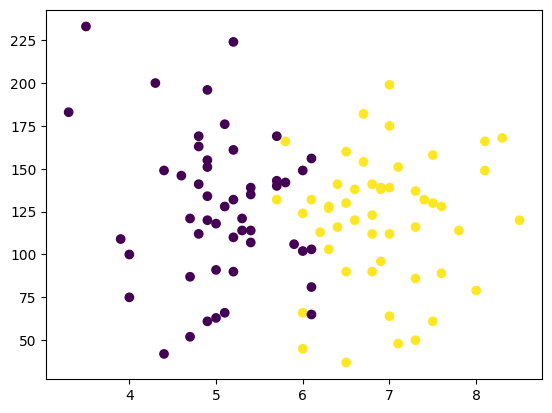

In [38]:
import matplotlib.pyplot as plt;
plt.scatter(df['cgpa'],df['iq'],c=df['placement']);

In [39]:
input=df.iloc[:,:2]

In [40]:
input

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [41]:
output=df.iloc[:,-1]

In [42]:
output

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [43]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(input, output, test_size=0.1)


In [44]:
xTrain

,cgpa,iq
0,6.8,123.0
72,7.3,116.0
34,4.8,163.0
35,6.8,90.0
30,7.6,128.0
...,...,...
24,4.7,121.0
58,8.0,79.0
6,5.7,143.0
83,7.5,130.0


In [45]:
yTrain

,placement
0,1
72,1
34,0
35,1
30,1
...,...
24,0
58,1
6,0
83,1


In [46]:
xTest

,cgpa,iq
81,5.4,107.0
88,4.4,149.0
23,4.7,87.0
22,4.9,120.0
96,4.4,42.0
26,7.0,199.0
85,5.8,166.0
54,6.4,141.0
46,5.3,114.0
13,6.4,116.0


In [47]:
yTest

,placement
81,0
88,0
23,0
22,0
96,0
26,1
85,1
54,1
46,0
13,1


In [48]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xTrain=sc.fit_transform(xTrain)
xTest=sc.transform(xTest)

In [50]:
xTrain

array([[ 0.65308553, -0.01318948],
       [ 1.08783182, -0.18998469],
       [-1.08589962,  0.99706882],
       [ 0.65308553, -0.84665258],
       [ 1.34867959,  0.1130928 ],
       [-0.3033563 ,  1.14860756],
       [-0.9120011 , -0.13947177],
       [ 0.82698405, -0.29101052],
       [-0.04250853, -0.54357509],
       [-0.99895036,  0.69399133],
       [ 0.39223776, -0.84665258],
       [ 1.78342588,  0.64347841],
       [ 0.39223776,  0.92129945],
       [ 2.13122291, -0.08895886],
       [ 0.56613628,  0.7697607 ],
       [-1.25979813,  0.56770904],
       [-0.04250853, -1.98319317],
       [ 0.91393331, -1.9074238 ],
       [ 0.74003479, -0.69511384],
       [-1.08589962, -0.29101052],
       [ 0.04444073,  0.82027362],
       [ 1.52257811, -0.2404976 ],
       [ 1.08783182, -0.94767841],
       [ 0.47918702,  0.36565738],
       [-2.39013848,  1.50219797],
       [ 0.21833925,  0.08783635],
       [ 0.56613628,  1.47694151],
       [-0.12945778, -0.44254926],
       [ 0.47918702,

In [51]:
xTest

array([[-0.56420407, -0.4172928 ],
       [-1.43369665,  0.64347841],
       [-1.17284887, -0.92242196],
       [-0.99895036, -0.08895886],
       [-1.43369665, -2.05896255],
       [ 0.82698405,  1.90630129],
       [-0.21640704,  1.07283819],
       [ 0.3052885 ,  0.44142675],
       [-0.65115333, -0.2404976 ],
       [ 0.3052885 , -0.18998469]])

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xTrain,yTrain)

LogisticRegression()

In [54]:
y_pred=model.predict(xTest)

In [55]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [56]:
yTest

,placement
81,0
88,0
23,0
22,0
96,0
26,1
85,1
54,1
46,0
13,1


In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest,y_pred)

0.9

<Axes: >

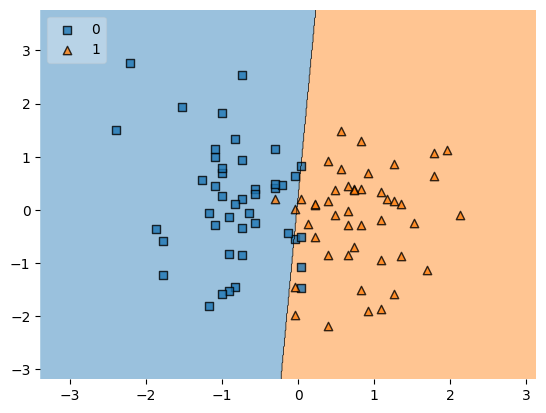

In [65]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(xTrain,yTrain.values,clf=model,legend=2)

In [66]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [67]:
  # Replace with your actual file name


FileNotFoundError: Cannot find file: PlacementPredictModel